In [1]:
import numpy as np
import sympy as sp
from sympy.plotting import plot
from sympy.parsing.sympy_parser import parse_expr
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def getPoints(f, l, r, n):
    delta = (r - l) / (n - 1)
    points = []
    for i in range(n):
        points.append((float(l + i * delta), float(f.subs(list(f.free_symbols)[0], l + i * delta))))
    return points

In [3]:
def trMatAlg(a, b, c, d):
    if(a.shape[0] == 1):
        return [d/b]
    alpha = np.zeros(a.shape[0] - 1, dtype = 'float')
    beta = np.zeros(a.shape[0] - 1, dtype = 'float')
    alpha[-1] = -a[-1] / b[-1]
    beta[-1] = d[-1] / b[-1]
    for i in range(alpha.shape[0] - 1, 0, -1):
        alpha[i - 1] = -a[i] / (b[i] + c[i] * alpha[i])
        beta[i - 1] = (d[i] - c[i] * beta[i]) / (b[i] + c[i] * alpha[i])
    x = np.zeros(a.shape[0], dtype = 'float')
    x[0] = (d[0] - beta[0]) / (alpha[0] * c[0] + b[0])
    for i in range(1, x.shape[0]):
        x[i] = alpha[i - 1] * x[i - 1] + beta[i - 1]
    return x

# Spline

In [4]:
def parsePoints(s):
    points = []
    pairs = s.split(';')
    for pair in pairs:
        fun = pair.split()
        points.append((float(fun[0]), float(fun[1])))
    return points

In [5]:
def cubicSpline(points):
    x, y = map(list, zip(*points))
    n = len(x) - 1;
    h = [x[i + 1] - x[i] for i in range(n)]
    A = [0] + h[1:-1]
    B = [2 * (h[i] + h[i + 1]) for i in range(n - 1)]
    C = h[1:-1] + [0]
    D = [float(3 * ((y[i + 2] - y[i + 1]) / h[i + 1] - (y[i + 1] - y[i]) / h[i])) for i in range(n - 1)]
    M = np.empty([n - 1, n - 1], dtype = 'float')
    for i in range(len(B)):
        M[i, i] = B[i]
        if i < len(B) - 1:
            M[i + 1, i] = A[i + 1]
            M[i, i + 1] = C[i]
    np.linalg.solve(M,D)
    c = [0] + list(np.linalg.solve(M, D))
    b = [float] * n
    for i in range(n - 1):
        b[i] = (y[i + 1] - y[i]) / h[i] - h[i] * (c[i + 1] + 2 * c[i]) / 3
    b[n - 1] = (y[n] - y[n - 1]) / h[n - 1] - 2./3 * c[n - 1] * h[n - 1]
    d = [float] * n
    for i in range(n - 1):
        d[i] = (c[i + 1] - c[i]) / (3 * h[i])
    d[n - 1] = -c[n - 1] / (3 * h[n - 1])
    a = y[:-1]
    return a, b, c, d

In [6]:
class spline:
    a = [float]
    b = [float]
    c = [float]
    d = [float]
    x = [float]
    free_symbols = [' ']
    def __init__(self, A, B, C, D, X):
        self.a = A
        self.b = B
        self.c = C
        self.d = D
        self.x = X
    def calc(self, val):
        l, r = 0, len(self.x) - 1
        while r > l:
            mid = int((l + r + 1) / 2)
            if self.x[mid] > val:
                r = mid - 1
            else:
                l = mid
        ind = l
        if ind == len(self.a):
            ind = ind - 1
        return self.a[ind] + self.b[ind] * (val - self.x[ind]) + self.c[ind] * (val - self.x[ind]) ** 2 + self.d[ind] * (val - self.x[ind]) ** 3
    def subs(self, trash, val):
        return self.calc(val)

[(0.0, 1.0), (0.512, 1.243), (1.0, 0.0), (1.5, 3.0), (2.0, -3.0)]


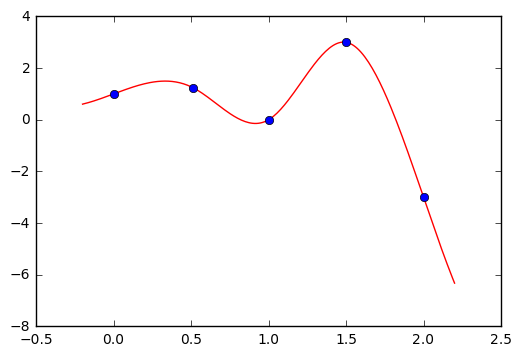

[(1.0, 0.0), (2.0, 1.0), (3.0, 3.0)]


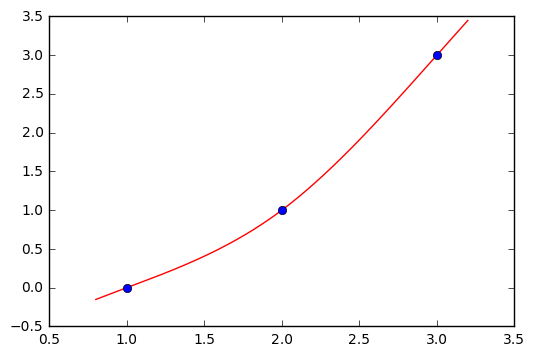

In [7]:
with open('input.txt') as f:
    lines = f.readlines()
for i in range(len(lines)):
    points = parsePoints(lines[i])
    points = sorted(points)
    print(points)
    a, b, c, d = cubicSpline(points)
    spl = spline(a, b, c, d, [p[0] for p in points])
    
    val, image = map(list, zip(*points))
    l, r = points[0][0], points[-1][0]
    
    sVal, sImage = map(list, zip(*getPoints(spl, l - 0.2, r + 0.2, int(100*(r - l)))))
    plt.plot(sVal, sImage, 'red', val, image, 'bo')
    plt.show()

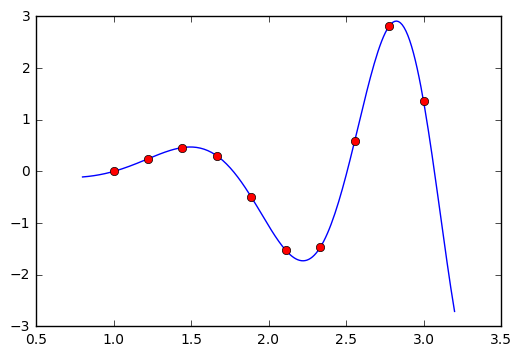

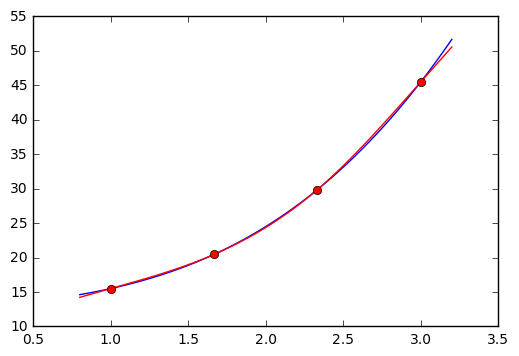

In [8]:
with open('inputFunc.txt') as f:
    fileData = f.read()
lines = fileData.split(';')
for l in lines:
    line = l.split('\n')
    line = [x for x in line if x]
    expr = parse_expr(line[0])
    nums = line[1].split()
    l = float(nums[0])
    r = float(nums[1])
    n = int(nums[2])

    points = getPoints(expr, l, r, n)
    pVal, pImage = map(list, zip(*points))
    a, b, c, d = cubicSpline(list(points))
    spl = spline(a, b, c, d, pVal)
    sVal, sImage = map(list, zip(*getPoints(spl, l - 0.2, r + 0.2, int(100*(r - l)))))
    fVal, fImage = map(list, zip(*getPoints(expr, l - 0.2, r + 0.2, int(100*(r - l)))))
    plt.plot(fVal, fImage, sVal, sImage, 'red', pVal, pImage, 'ro')
    plt.show()